## SVM

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well (look at the below snapshot).

Support Vectors are simply the co-ordinates of individual observation. Support Vector Machine is a frontier which best segregates the two classes (hyper-plane/ line).

- Pros:
    1. It works really well with clear margin of separation
    2. It is effective in high dimensional spaces.
    3. It is effective in cases where number of dimensions is greater than the number of samples.
    4. It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

- Cons:
    1. It doesn’t perform well, when we have large data set because the required training time is higher
    2. It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
    3. SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is related SVC method of Python scikit-learn library.


### The kernel trick

In our example we found a way to classify nonlinear data by cleverly mapping our space to a higher dimension. However, it turns out that calculating this transformation can get **pretty computationally expensive**: there can be a lot of new dimensions, each one of them possibly involving a complicated calculation. Doing this for every vector in the dataset can be a lot of work, so it’d be great if we could find a cheaper solution.

And we’re in luck! Here’s a trick: SVM doesn’t need the actual vectors to work its magic, it actually can get by only with the dot products between them. This means that we can sidestep the expensive calculations of the new dimensions! This is what we do instead:

Imagine the new space we want:

z = x² + y²


Figure out what the dot product in that space looks like:

a · b = xa · xb  +  ya · yb  +  za · zb

a · b = xa · xb  +  ya · yb +  (xa² + ya²) · (xb² + yb²)


**Tell SVM to do its thing, but using the new dot product — we call this a kernel function.**

That’s it! That’s the kernel trick, which allows us to sidestep a lot of expensive calculations. Normally, the kernel is linear, and we get a linear classifier. However, by using a nonlinear kernel (like above) we can get a nonlinear classifier without transforming the data at all: we only change the dot product to that of the space that we want and SVM will happily chug along.

Note that the kernel trick isn’t actually part of SVM. It can be used with other linear classifiers such as logistic regression. A support vector machine only takes care of finding the decision boundary.

### SVM be used with natural language classification

So, we can classify vectors in multidimensional space. Now, we want to apply this algorithm for text classification, and the first thing we need is a way to **transform a piece of text into a vector of numbers** so we can run SVM with them. In other words, which features do we have to use in order to classify texts using SVM?

The most common answer is **word frequencies**, just like we did in Naive Bayes. This means that we treat a text as a bag of words, and for every word that appears in that bag we have a feature. The value of that feature will be how frequent that word is in the text.

This method boils down to just counting how many times every word appears in a text and dividing it by the total number of words. So in the sentence “All monkeys are primates but not all primates are monkeys” the word monkeys has a frequency of 2/10 = 0.2, and the word but has a frequency of 1/10 = 0.1 .

For a more advanced alternative for calculating frequencies, we can also use **TF-IDF**.

Now that we’ve done that, **every text in our dataset is represented as a vector with thousands (or tens of thousands) of dimensions**, every one representing the frequency one of the words of the text. This is what we feed to SVM for training. We can improve this by using preprocessing techniques, like stemming, removing stopwords, and using n-grams.



#### Choosing a kernel function

Now that we have the feature vectors, the only thing left to do is choosing a kernel function for our model. Every problem is different, and the kernel function depends on what the data looks like. In our example, our data was arranged in concentric circles, so we chose a kernel that matched those data points.

Taking that into account, what’s best for natural language processing? Do we need a nonlinear classifier? Or is the data linearly separable? It turns out that it’s best to stick to a linear kernel. Why?

Back in our example, we had two features. Some real uses of SVM in other fields may use tens or even hundreds of features. Meanwhile, NLP classifiers use thousands of features, since they can have up to one for every word that appears in the training data. This changes the problem a little bit: while using nonlinear kernels may be a good idea in other cases, having this many features will end up making nonlinear kernels overfit the data. Therefore, it’s best to just stick to a good old linear kernel, which actually results in the best performance in these cases.

Putting it all together
Now the only thing left to do is training! We have to take our set of labeled texts, convert them to vectors using word frequencies, and feed them to the algorithm — which will use our chosen kernel function — so it produces a model. Then, when we have a new unlabeled text that we want to classify, we convert it into a vector and give it to the model, which will output the tag of the text.

### Summary

- A support vector machine allows you to classify data that’s linearly separable.
- If it isn’t linearly separable, you can use the kernel trick to make it work.
- However, for text classification it’s better to just stick to a linear kernel.

Compared to newer algorithms like neural networks, they have two main advantages: higher speed and better performance with a limited number of samples (in the thousands). This makes the algorithm very suitable for text classification problems, where it’s common to have access to a dataset of at most a couple of thousands of tagged samples.




### Python Implenmentation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [14]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
                     # avoid this ugly slicing by using a two-dim dataset
y = iris.target

####  Linear kernel

In [9]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1, gamma='auto').fit(X, y)

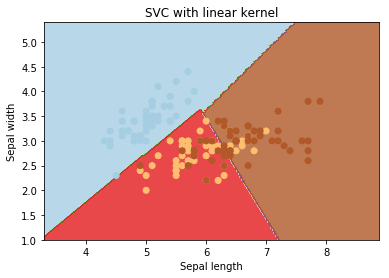

In [13]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

#### RBF kernel

In [16]:
svc = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X, y)

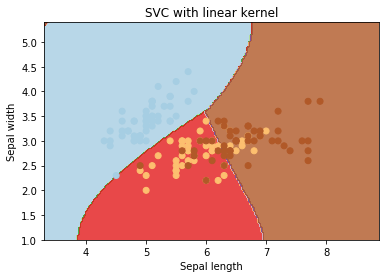

In [17]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

I would suggest you to go for linear kernel if you have large number of features (>1000) because it is more likely that the data is linearly separable in high dimensional space. Also, you can RBF but do not forget to cross validate for its parameters as to avoid over-fitting.

### Kernel Parameters

- **Gamma**: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.



<img src="files/SVM-gamma.webp">

- **C**: Penalty parameter C of the error term. It also controls the trade off between smooth decision boundary and classifying the training points correctly.

<img src="files/SVM-C.webp">

We should always look at the cross validation score to have effective combination of these parameters and avoid over-fitting.

